In [1]:
import pandas as pd

# read data
comments_df = pd.read_csv("/Users/cheryl/Desktop/Project Forum/Data/edmw_data_clean.csv")

# select only relevant columns
comments_df = comments_df[["Comment"]]
comments_df = comments_df.astype(str)
comments_df.head()

,Comment
0,jin sian... saw ant in kitchen while lim kopi ...
1,in before thread promoted
2,forgiven
3,clone infestation
4,"in the name of supreme leader lee, you are for..."


In [2]:
comments_df = comments_df.sample(frac = 0.1, replace = False, random_state=42)
comments_df.head()

,Comment
793751,looks cleaner.. someone commuted that some not...
53207,i oso +1 tiger!
224736,wanna give gift at least do a bit of homework ...
33945,some random coffee shop in bedok. i am going t...
397340,hai di lao supper?


In [3]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
comments_df["comment_clean"] = comments_df["Comment"].apply(lambda x: clean_text(x))

In [4]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
comments_df["sentiments"] = comments_df["Comment"].apply(lambda x: sid.polarity_scores(x))
comments_df = pd.concat([comments_df.drop(['sentiments'], axis=1), comments_df['sentiments'].apply(pd.Series)], axis=1)

In [5]:
comments_df.head()

,Comment,comment_clean,neg,neu,pos,compound
793751,looks cleaner.. someone commuted that some not...,look clean someone commute note play hand,0.000,0.833,0.167,0.3400
53207,i oso +1 tiger!,oso tiger,0.000,1.000,0.000,0.0000
224736,wanna give gift at least do a bit of homework ...,wanna give gift least bit homework please dont...,0.191,0.572,0.237,0.1174
33945,some random coffee shop in bedok. i am going t...,random coffee shop bedok go rtm,0.000,1.000,0.000,0.0000
397340,hai di lao supper?,hai di lao supper,0.000,1.000,0.000,0.0000


In [6]:
average_negative = comments_df["neg"].mean()
average_negative

0.07361193550688545

In [7]:
average_positive = comments_df["pos"].mean()
average_positive

0.11117067667831516

In [8]:
average_neutral = comments_df["neu"].mean()
average_neutral

0.8149142514446821

<h1>Results for Level of Positivity</h1>
74% neutral comments<br>
11.1% positive comments<br>
8.2% negative comments<br><br>

The comments on Reddit are largely neutral, and there are actually more positive than negative comments!
We are however limited in the ability to sieve through positive and negative singlish slang.<br>
Intuitively, there might be a lot more negative words written in Singlish.


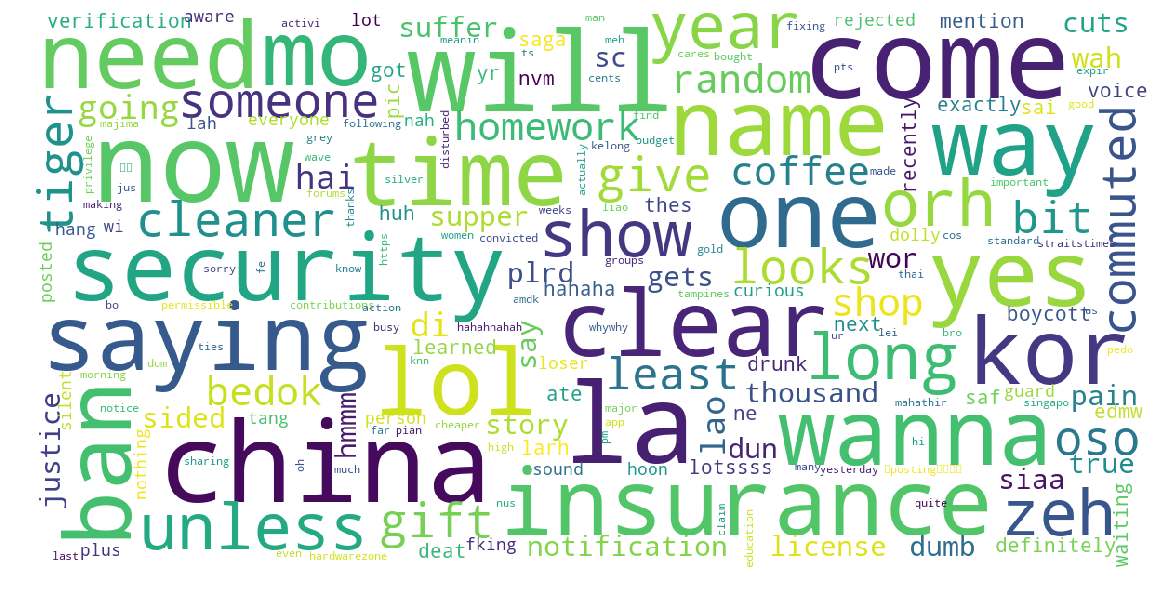

In [13]:
# generating a wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(comments_df["Comment"])

Looks like edmw folks love saying "china", "insurance", "security", "clear", "come".<br>
What is "plrd?"<br><br>

Some Singlish:<br>
la<br>
zeh<br>
siaa<br>
oso<br>
wor<br>
kelong<br>
bo<br>
wah<br>
bo<br>
hai<br>
lah<br>



In [11]:
# highest positive sentiment reviews
comments_df.sort_values("pos", ascending = False)[["Comment", "pos"]].head(10)

,Comment,pos
509501,lol,1.0
1142700,interesting,1.0
1032877,lol,1.0
1770261,gg,1.0
693495,truth .,1.0
1929589,interesting,1.0
1214239,thanks thanks,1.0
419084,hahaha,1.0
528737,haha.,1.0
605056,hahaha,1.0


In Singapore, gg means good-game. This is by no means something that is positive, but the nltk (natural language toolkit) might have taken this literally as going/good game. But really in Singapore this terminology is used to laugh at others being miserable. 

In [12]:
# highest lowest sentiment reviews
comments_df.sort_values("neg", ascending = False)[["Comment", "neg"]].head(10)

,Comment,neg
676247,sob sob sob,1.0
1436410,slashed.,1.0
1794459,wtf,1.0
1570825,heartbreak?,1.0
1792455,freaky!,1.0
2044428,no no no no no,1.0
130026,penalty!!!,1.0
748381,no,1.0
407561,penalty . damn,1.0
638329,seriously,1.0
